# Diracstöße bzw. Polstellen in der Laplace-Ebene
Über $\sigma$ und $\omega$ werden die Positionen konjugierter Diracimpulse bzw. Polstellen (für kausalen Cosinus) im Laplace-Bereich vorgegeben. Im Plot links wird die Laplaceebene gezeigt. Der rechte Plot zeigt das entsprechende Zeitsignal.

Output()

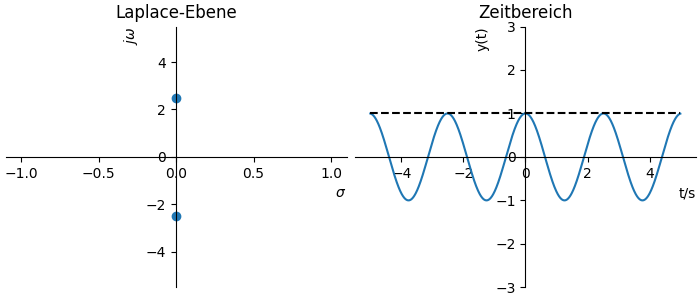

In [1]:
"""
Beispielscript im Matlab-Style (Import und tw. Wrapping auf Matlab-Wording), 
Kernfunktionalität für Studierende mit Matlaberfahrung unmittelbar les- und verstehbar

(c) Benno Dömer | HS Pforzheim 2022 

"""
import platform
if platform.system() == "Emscripten": # running in JupyterLite
    %pip install -q ipywidgets
    %pip install -q ipympl

# 'widget' für interaktive Plots
%matplotlib widget 

# Import so, dass möglichst viele Funktionen "wie in Matlab" zur Verfügung stehen:
from numpy import (pi, log10, exp, sqrt, sin, cos, tan, angle, arange, linspace, zeros, ones) # numpy für's Rechnen, bei Bedarf anpassen
from matplotlib.pyplot import (figure, plot, stem, legend, text, show,  
                               grid, xlabel, ylabel, subplot, title, clf, cla, xlim, ylim) # matpotlib für's  Plotten, bei Bedarf anpassen
from matplotlib.pyplot import fill_between as area # Beispiel für eine Mapping auf Matlab-Bezeichnung
import ipywidgets as widgets # interaktive Controls wie Slider, Dropdowns etc.

fig1 = figure(figsize=(7, 3), dpi=100, 
       layout='constrained',num=' ') # bei Bedarf anpassen, Achtung Tablet: Nicht über 7 Breite; Titel hinter "num", hier Leerzeichen

def myplotstyle(ax): # Hilfsfunktion, hübscht den Plot etwas auf
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data',0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data',0))
    
# Plotbefehle werden in eine Funktion verpackt, die dann bei Interaktionen aufgerufen wird. Hier ist die Kernfunktionalität
# In Python wird statt mit Klammern oder Schlüsselwörtern wie "end" mit Einrückungen gearbeitet
def plotdata(omega,sigma,causal):
    t = arange(-5,5,0.01); #Matlab: t=-5:0.01:5;
    y = cos(omega*t)*exp(sigma*t); #Matlab: mit Punktnotation
    if causal:
        y[t<0]=0
        
    
    ax1 = subplot(1,2,1) # Plot für Laplacebene
    cla()#matplotlib löscht den Plot nicht, "hold on"-Verhalten => explizit löschen 
    plot([sigma,sigma],[omega,-omega],'o')
    ylabel('$j\omega$',loc='top')
    xlabel('$\sigma$',loc='right')
    title('Laplace-Ebene')
    xlim(-1.1,1.1)
    ylim(-5.5,5.5)
    myplotstyle(ax1)
    
    ax2 = subplot(1,2,2) # Plot im Zeitbereich
    cla() 
    plot(t,y,t,exp(sigma*t),'--k')
    xlabel('t/s',loc='right')
    ylabel('y(t)',loc='top')
    title('Zeitbereich')
    myplotstyle(ax2) # schön machen ausgelagert
    ylim(-3,3)
    fig1.canvas.draw()
    
# Interaktion: 
# Definition von Controls: 
sigmaslider  = widgets.FloatSlider(min=-1, max=1, step=0.1, value=0, continuous_update=True, description='$\sigma$')
omegaslider  = widgets.FloatSlider(min=0, max=5, step=0.1, value=2.5, continuous_update=True, description='$\omega$')
causalcb  = widgets.Checkbox(value=False, description='Kausaler Cos')

# Arrangieren hier in horizontaler Box:
ui1 = widgets.HBox([omegaslider, sigmaslider,causalcb])
#Verknüpfen mit Callback
out = widgets.interactive_output(plotdata, { 'omega': omegaslider,'sigma': sigmaslider,'causal':causalcb}) 
#Anzeigen
display(ui1,out)
show()